In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
plt.style.use('dark_background')

from sklearn import  datasets
plt.show()

In [2]:
from sklearn import  datasets
plt.show()
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [3]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['kinds'] = pd.DataFrame(iris.target)

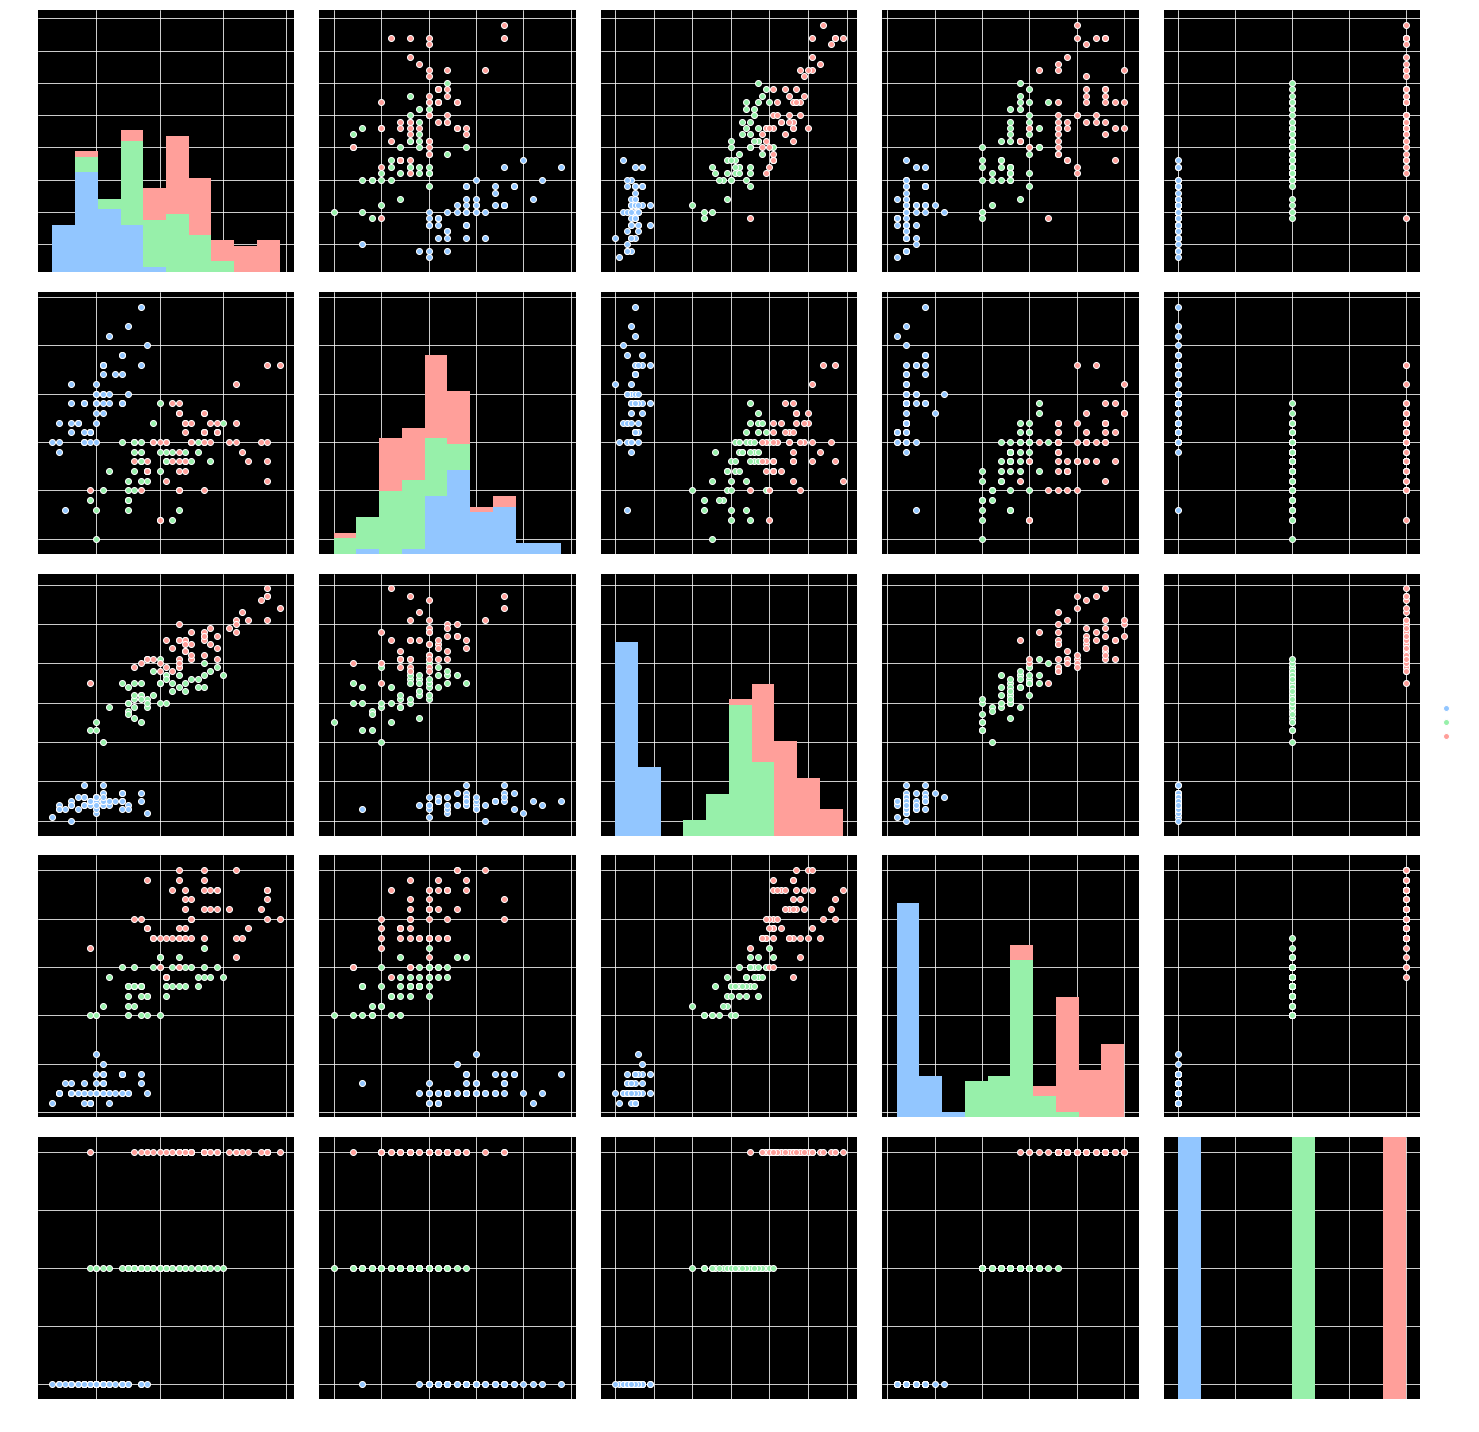

In [4]:
sns.pairplot(iris_df, hue='kinds',palette='pastel', size=4)

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

In [45]:
tree.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=19,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [32]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

<Figure size 432x288 with 0 Axes>

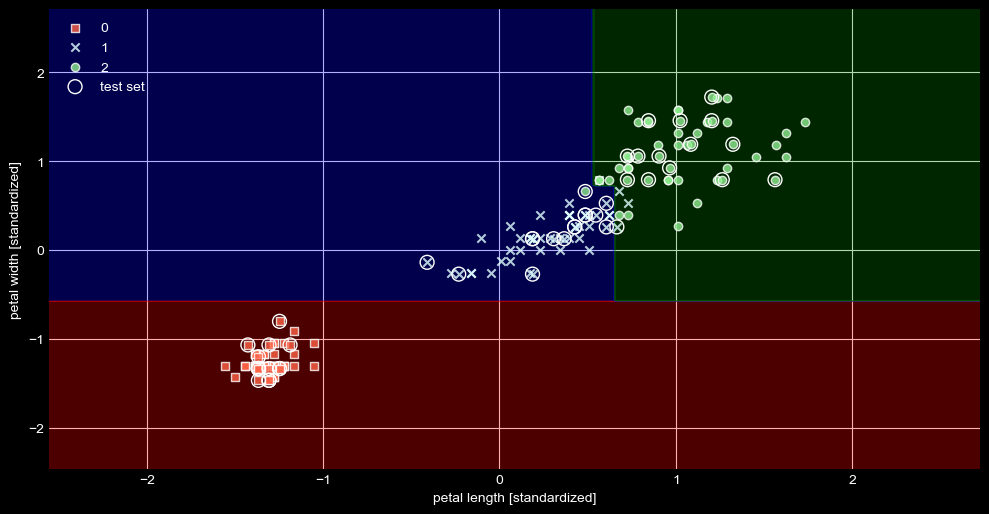

In [33]:
%run myGraph.py
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

### 木の深さdepthのパラメータ確認

In [34]:
weights, params, predict = [], [], []
for depth in np.arange(1,20):
    
    tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=1)
    tree.fit(X_train_std, y_train)
    params.append(depth)
    
    y_pred = tree.predict(X_test_std)
    y_c = pd.DataFrame(np.c_[y_pred, y_test], columns={'predict', 'original'})
    predict.append(round((y_c['predict'] == y_c['original']).sum() / len(y_c['predict']) * 100,0))

UsageError: Line magic function `%ax.set_xscale` not found.


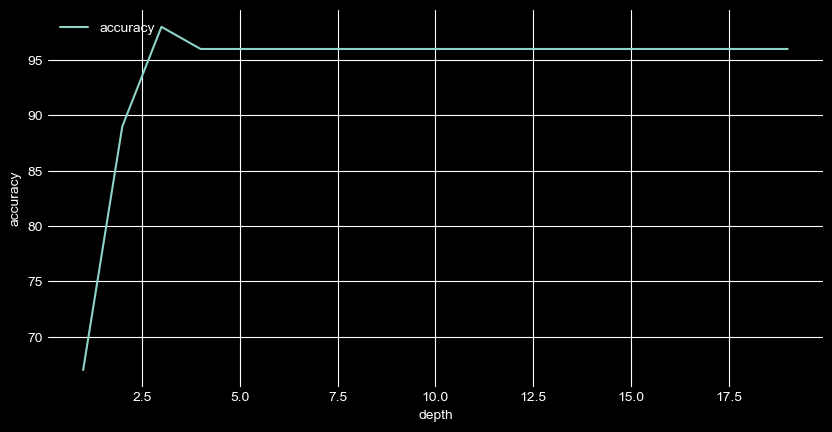

In [35]:
fig = plt.figure(figsize=(10,5),dpi=100)
ax = plt.axes()
ax.plot(params, predict, label = 'accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('depth')
ax.legend(loc='upper left')
%ax.set_xscale('log')

In [37]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [47]:
dot_data = export_graphviz(tree,
                          filled=True,
                          rounded=True,
                          class_names=['Septosa', 'Versicolor', 'Virginics'],
                          feature_names=['petal length', 'petal width'],
                          out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')


True